#### Importowanie bibliotek

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [ ]:
df = pd.read_excel("../Tabela 1.xlsx")

In [3]:
df.head()

,Name,Exposure,class,Chemical,SEX (M/F),Gen1,Gen2,Gen3,Gen4,Gen5,...,Gen2971,Gen2972,Gen2973,Gen2974,Gen2975,Gen2976,Gen2977,Gen2978,Gen2979,Gen2980
0,Sample1,Control,C(M),Control,M,1.126636,0.982482,0.965753,0.795236,1.093474,...,1.943480,2.059138,0.560137,1.073068,1.864937,0.949825,2.004953,1.894345,1.801144,2.116696
1,Sample2,Control,C(M),Control,M,1.102942,0.792857,0.842533,0.704507,0.803609,...,1.933369,1.939796,1.226766,1.118514,1.815777,0.846754,1.921322,1.782817,1.704406,2.068778
2,Sample3,Control,C(M),Control,M,1.129240,0.989232,0.974295,0.771200,0.970926,...,1.919848,2.077602,1.084620,1.089832,1.825995,1.043954,1.998114,1.845221,1.728693,2.097107
3,Sample4,Control,C(M),Control,M,1.100176,1.010291,0.802952,0.696876,0.617705,...,1.941300,2.034530,1.401092,1.067069,1.814479,0.860357,2.041024,1.772065,1.633040,2.052009
4,Sample5,Control,C(M),Control,M,1.052659,1.033912,0.697614,1.229266,0.642373,...,1.933198,1.920972,0.971900,1.132778,1.831693,0.872452,1.849572,1.798413,1.777406,1.989491


#### Standaryzacja danych

In [45]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns (excluding 'Name' and 'Group')
numeric_columns = df.drop(['Name', 'Group'], axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify standardization
print("Mean of standardized features:")
print(df[numeric_columns].mean().mean())
print("\nStandard deviation of standardized features:")
print(df[numeric_columns].std().mean())

Mean of standardized features:
2.8511253912073764e-18

Standard deviation of standardized features:
1.0047506205640333


#### Analiza PCA

Variance explained:
PC1: 54.72%
PC2: 3.10%
PC3: 1.87%
PC4: 0.72%
PC5: 0.59%
PC6: 0.52%
Total variance explained (6 components): 61.53%


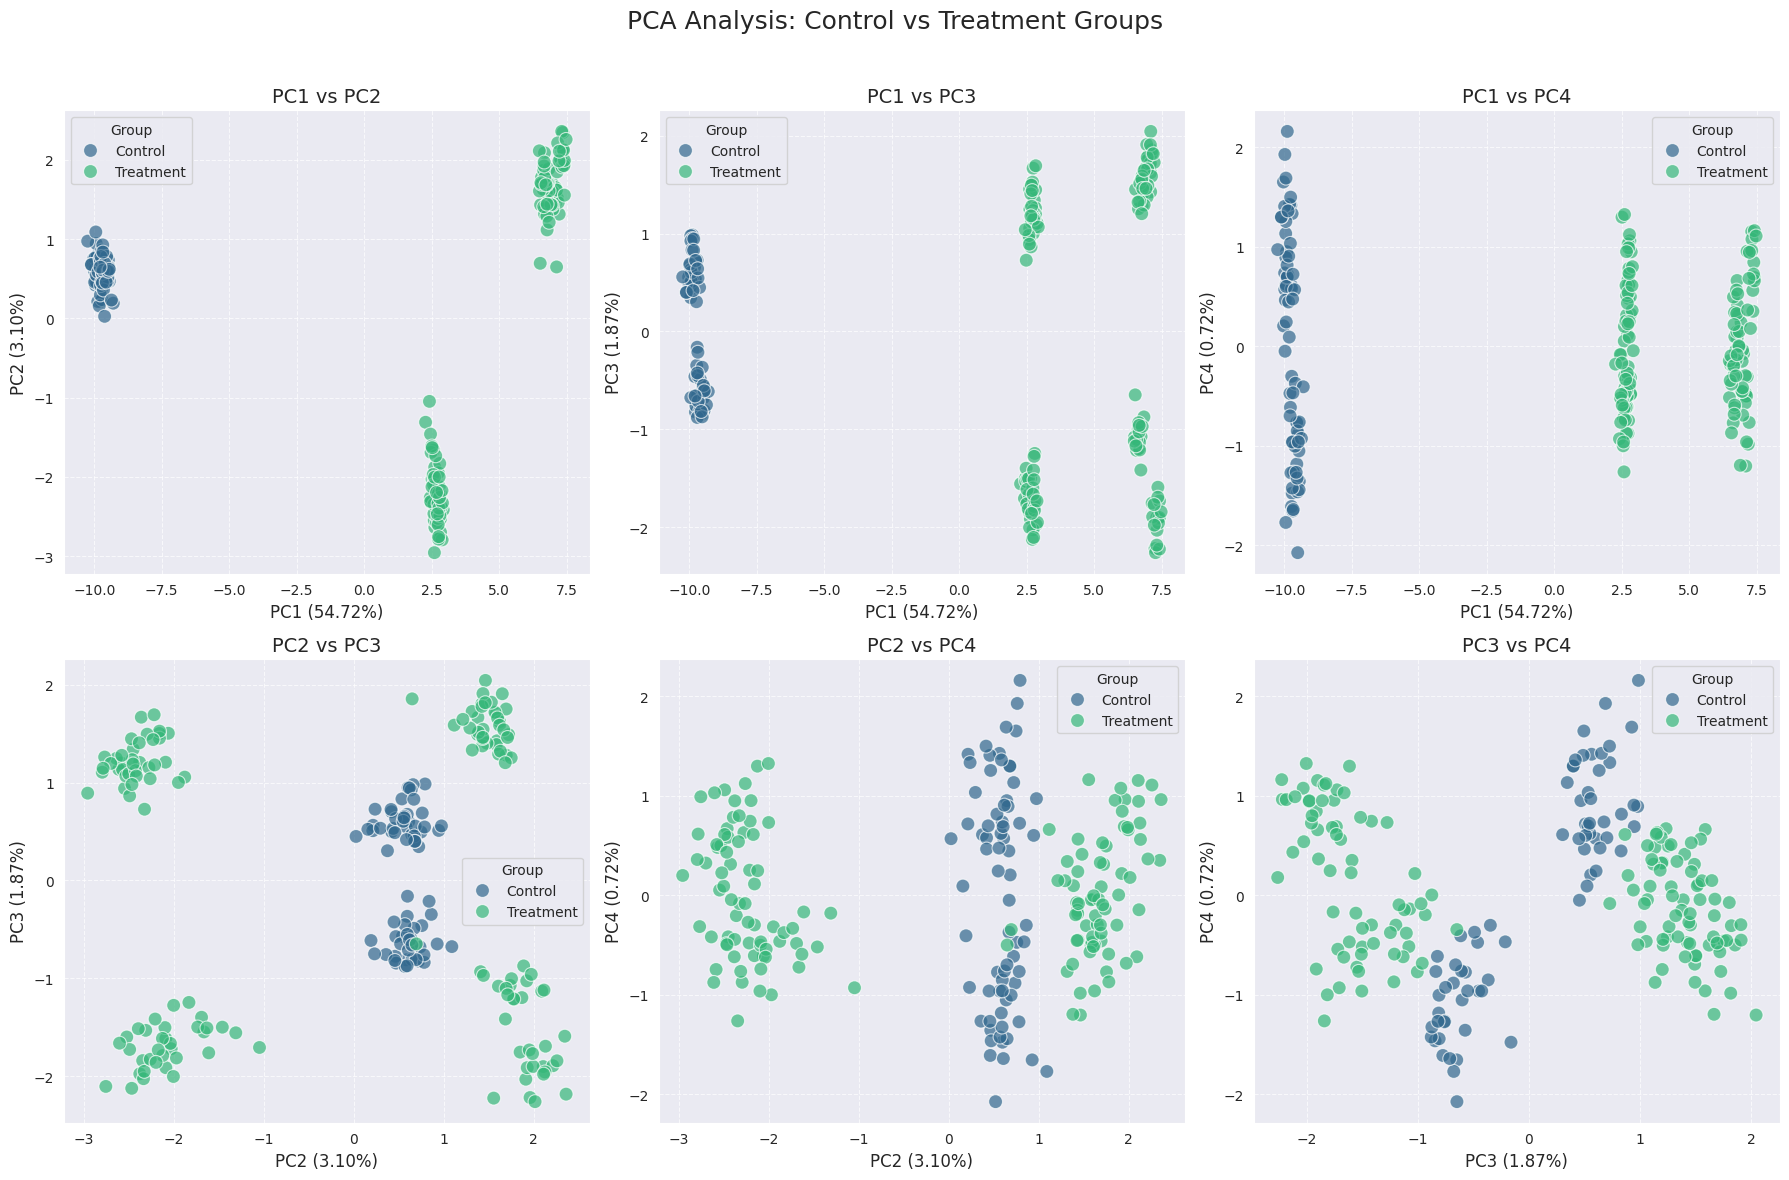

In [5]:
# Identify control and non-control samples
df['is_control'] = df['Exposure'].str.contains('Control')

# Exclude non-numeric columns for PCA
X = df.drop(['Name', 'Exposure', "class", 'Chemical', 'SEX (M/F)', 'is_control'], axis=1)

# Apply PCA with more components for grid visualization
pca = PCA(n_components=6)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components, 
    columns=[f'PC{i+1}' for i in range(6)]
)
pca_df['Group'] = df['is_control'].map({True: 'Control', False: 'Treatment'})
pca_df['Name'] = df['Name']

# Calculate variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2%}")
print(f"Total variance explained (6 components): {sum(explained_variance):.2%}")

# Create a grid of plots comparing different PCs
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# PC combinations to plot
pc_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (pc1, pc2) in enumerate(pc_pairs):
    sns.scatterplot(
        x=f'PC{pc1+1}', 
        y=f'PC{pc2+1}', 
        hue='Group', 
        data=pca_df, 
        palette='viridis',
        s=100,
        alpha=0.7,
        ax=axes[i]
    )
    
    # Add variance labels to axis titles
    axes[i].set_xlabel(f'PC{pc1+1} ({explained_variance[pc1]:.2%})', fontsize=12)
    axes[i].set_ylabel(f'PC{pc2+1} ({explained_variance[pc2]:.2%})', fontsize=12)
    axes[i].set_title(f'PC{pc1+1} vs PC{pc2+1}', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend(title='Group')

# Add a main title
plt.suptitle('PCA Analysis: Control vs Treatment Groups', fontsize=18, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Wykres opisywanej wariancji przez 10 głównych składowych

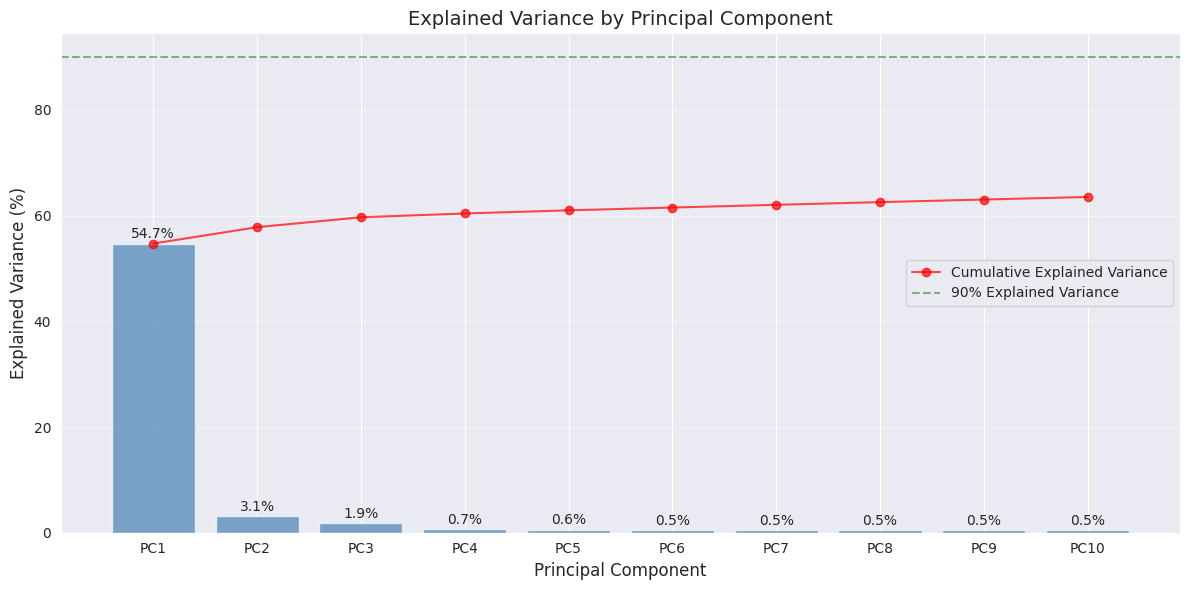

In [6]:
# Calculate variance explained for all components
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Create explained variance plot
plt.figure(figsize=(12, 6))

# Bar plot of individual explained variance
plt.bar(range(1, 11), explained_variance_ratio[:10] * 100, alpha=0.7, color='steelblue')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance (%)', fontsize=12)
plt.title('Explained Variance by Principal Component', fontsize=14)
plt.xticks(range(1, 11), [f'PC{i}' for i in range(1, 11)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add cumulative explained variance line
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, 11), cumulative_variance[:10] * 100, 'ro-', alpha=0.7, label='Cumulative Explained Variance')

# Add percentage annotations on bars
for i, v in enumerate(explained_variance_ratio[:10]):
    plt.text(i+1, v*100 + 1, f"{v*100:.1f}%", ha='center', fontsize=10)

plt.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='90% Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()

Top genes contributing to PC1:
1. Gen1099: 0.0276 (positive correlation)
2. Gen2673: 0.0276 (positive correlation)
3. Gen2574: 0.0276 (positive correlation)
4. Gen2918: 0.0275 (positive correlation)
5. Gen2240: 0.0275 (positive correlation)
6. Gen2784: 0.0275 (positive correlation)
7. Gen2462: 0.0275 (positive correlation)
8. Gen428: 0.0274 (positive correlation)
9. Gen2359: 0.0274 (positive correlation)
10. Gen2309: 0.0273 (positive correlation)
11. Gen2041: 0.0273 (positive correlation)
12. Gen2454: 0.0273 (positive correlation)
13. Gen1596: 0.0273 (positive correlation)
14. Gen2169: 0.0272 (positive correlation)
15. Gen517: 0.0272 (positive correlation)


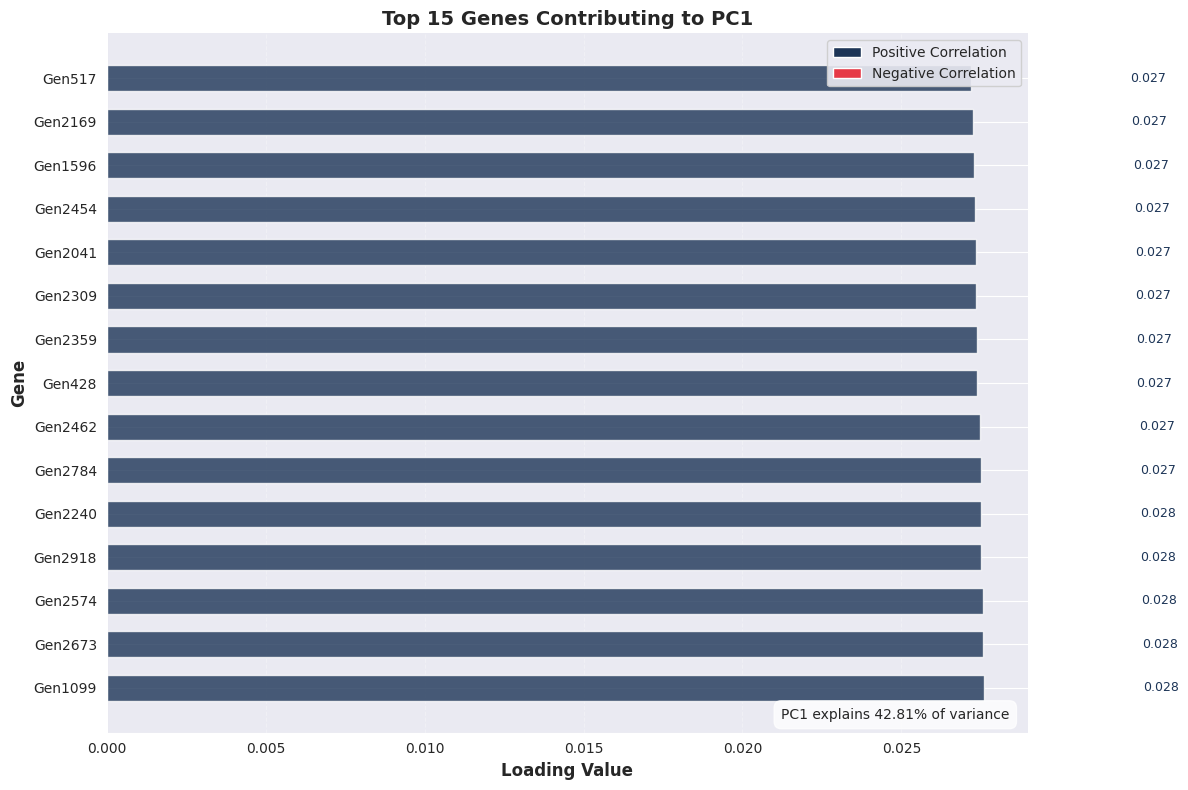

Top genes contributing to PC2:
1. Gen519: 0.0716 (positive correlation)
2. Gen680: 0.0700 (positive correlation)
3. Gen941: 0.0678 (positive correlation)
4. Gen1112: 0.0678 (positive correlation)
5. Gen859: 0.0656 (positive correlation)
6. Gen1331: 0.0645 (positive correlation)
7. Gen509: 0.0629 (positive correlation)
8. Gen2607: -0.0623 (negative correlation)
9. Gen692: 0.0614 (positive correlation)
10. Gen467: 0.0608 (positive correlation)
11. Gen1220: 0.0606 (positive correlation)
12. Gen1301: 0.0606 (positive correlation)
13. Gen1296: 0.0602 (positive correlation)
14. Gen921: 0.0597 (positive correlation)
15. Gen1018: 0.0592 (positive correlation)


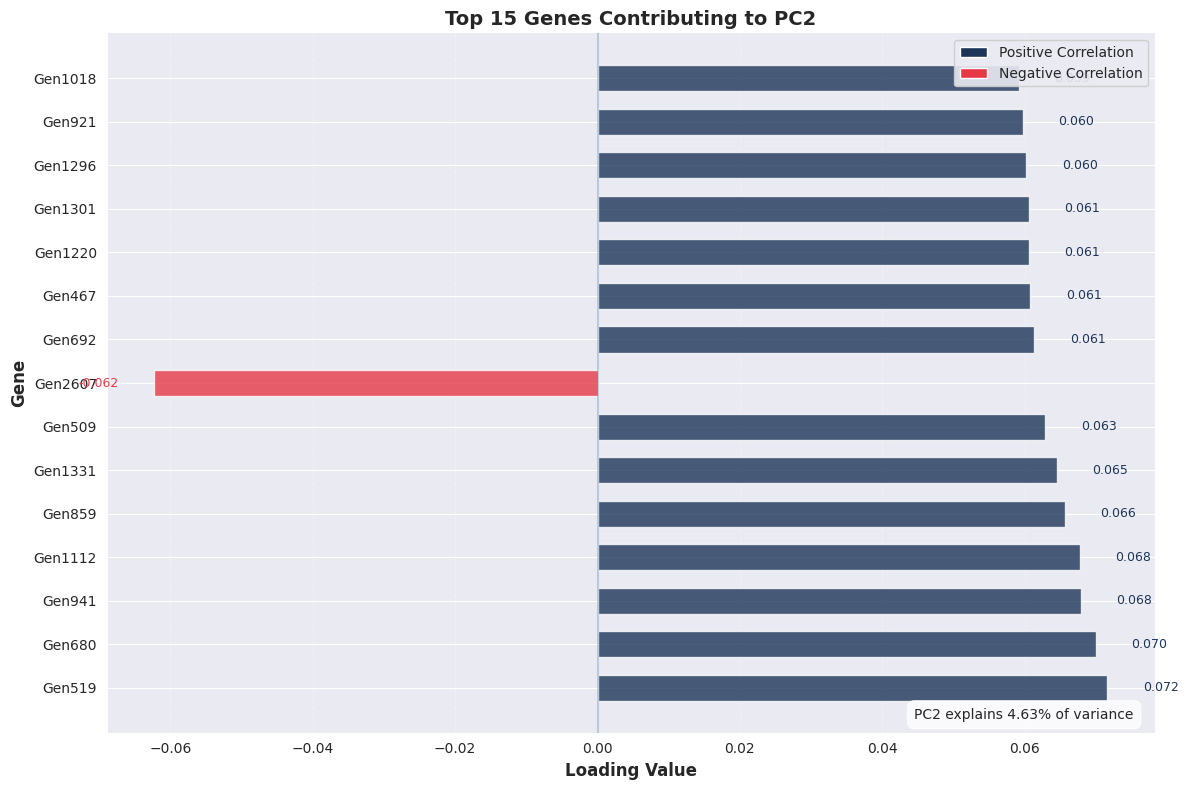

Top genes contributing to PC3:
1. Gen2734: 0.0997 (positive correlation)
2. Gen2563: 0.0967 (positive correlation)
3. Gen2684: 0.0948 (positive correlation)
4. Gen1555: 0.0931 (positive correlation)
5. Gen2151: 0.0922 (positive correlation)
6. Gen2401: 0.0904 (positive correlation)
7. Gen2755: 0.0902 (positive correlation)
8. Gen1579: 0.0879 (positive correlation)
9. Gen2534: 0.0844 (positive correlation)
10. Gen2963: 0.0844 (positive correlation)
11. Gen2243: 0.0831 (positive correlation)
12. Gen2935: 0.0823 (positive correlation)
13. Gen2676: 0.0803 (positive correlation)
14. Gen2212: 0.0800 (positive correlation)
15. Gen2922: 0.0792 (positive correlation)


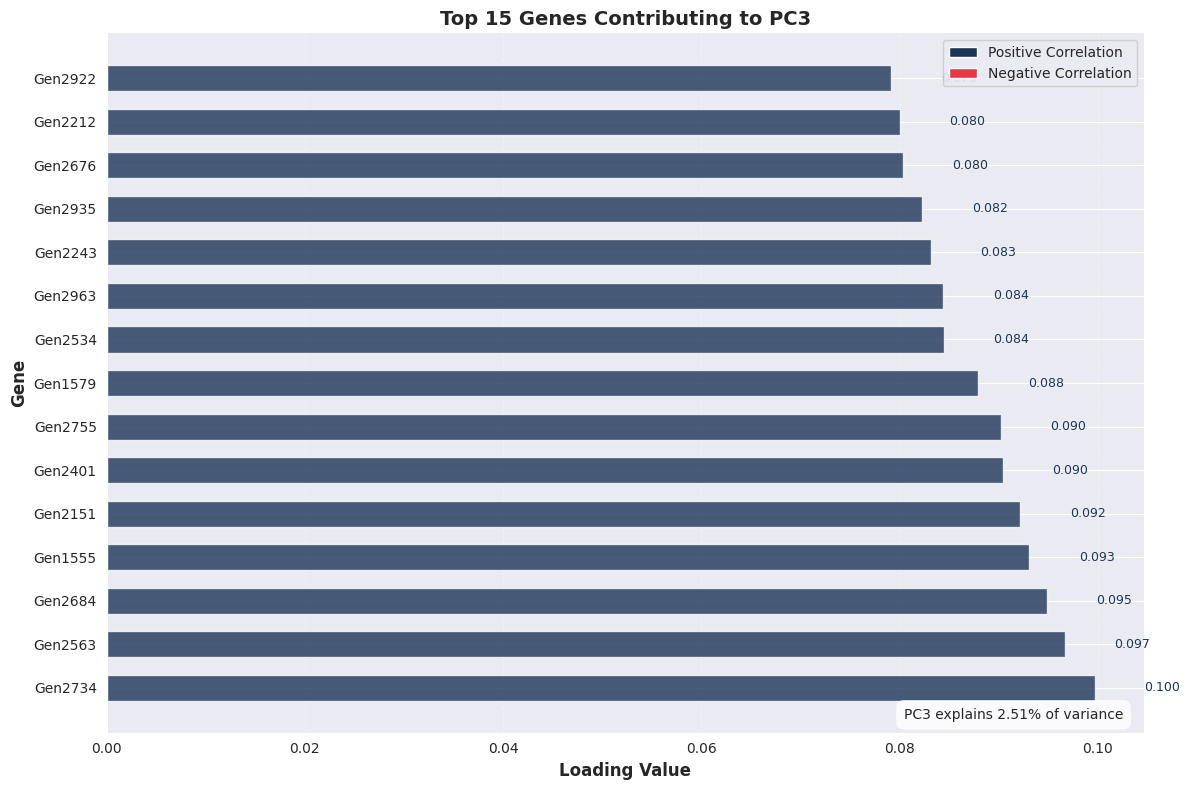

In [17]:
from matplotlib.patches import Patch

# Calculate the loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(6)],
    index=X.columns
)

# Function to visualize gene contributions for a specific PC with improved styling
def plot_gene_contributions(pc_name, n=15):
    pc_loadings = loadings[pc_name]
    # Sort by absolute value but keep the sign
    top_genes_idx = pc_loadings.abs().sort_values(ascending=False).head(n).index
    top_loadings = pc_loadings[top_genes_idx]
    
    # Create color palette based on values
    colors = ['#E63946' if x < 0 else '#1D3557' for x in top_loadings]
    
    # Create the figure with better aesthetics
    fig, ax = plt.figure(figsize=(12, 8)), plt.gca()
    
    # Plot horizontal bars
    bars = ax.barh(top_genes_idx, top_loadings, color=colors, height=0.6, alpha=0.8)
    
    # Add vertical line at x=0
    ax.axvline(x=0, color='#457B9D', linestyle='-', alpha=0.3, lw=1.5)
    
    # Add values to the end of each bar
    for i, bar in enumerate(bars):
        value = top_loadings.iloc[i]
        ax.text(value + (0.005 if value > 0 else -0.005), 
                bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}',
                va='center', 
                ha='left' if value > 0 else 'right',
                fontsize=9,
                color='#1D3557' if value > 0 else '#E63946')
    
    # Customize aesthetics
    ax.set_xlabel(f'Loading Value', fontsize=12, fontweight='bold')
    ax.set_ylabel('Gene', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {n} Genes Contributing to {pc_name}', fontsize=14, fontweight='bold')
    
    # Add explanation text
    variance_explained = pca.explained_variance_ratio_[int(pc_name[2])-1] * 100
    ax.text(0.98, 0.02, 
            f'{pc_name} explains {variance_explained:.2f}% of variance', 
            transform=ax.transAxes, 
            ha='right', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add a legend
    legend_elements = [
        Patch(facecolor='#1D3557', label='Positive Correlation'),
        Patch(facecolor='#E63946', label='Negative Correlation')
    ]
    ax.legend(handles=legend_elements, loc='upper right', frameon=True, framealpha=0.9)
    
    # Grid for readability
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    return top_loadings, fig

for i in range(1,4):
    # Analyze and visualize PC3 (or any other PC of interest)
    pc_to_analyze = f'PC{i}'
    top_genes_loadings, fig = plot_gene_contributions(pc_to_analyze, n=15)

    # Get list of the top genes for further analysis
    genes = top_genes_loadings.index.tolist()

    # Print detailed information about the genes
    print(f"Top genes contributing to {pc_to_analyze}:")
    for i, (gene, loading) in enumerate(top_genes_loadings.items(), 1):
        direction = "positive" if loading > 0 else "negative"
        print(f"{i}. {gene}: {loading:.4f} ({direction} correlation)")

    plt.show()

Wyniki analizy PCA wskazują na to, że jest istotna różnica pomiędzy grupą kontrolną a grupą badaną. 

Z macierzy ładunków czynnikowych widać, które geny mają największy wkład do poszczególnych głównych składowych.